# NFL Dataset Cleanup

In [1]:
# Basic package
import pandas as pd
import numpy as np
import datetime as dt

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Imbalance dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# Save model for future use
import pickle

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# initializing a random seed
np.random.seed(42)

In [2]:
# Display all results in a cell, not just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Display all columns
pd.set_option('display.max_columns', None)

In [3]:
# read in datasets
df_1 = pd.read_csv('data/NFL Analytics Challenge Data Set 1_reformat.csv')
df_2 = pd.read_csv('data/NFL Analytics Challenge Data Set 2_reformat.csv')
df_3 = pd.read_csv('data/NFL Analytics Challenge Data Set 3.csv')

In [4]:
# preview dataset1
df_1.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,9/5/2002,. 49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32:00,32:28:00
1,9/8/2002,Seahawks,Raiders,14,27,1-11,7-12,2-2,1-1,143,202,43,221,423,423,23-32,19-28,3-12,2-12,16,40,0,1,0,1,0,2,13-105,5-45,0-2,0-2,4,4,0,0,25:09:00,34:51:00
2,9/8/2002,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08:00
3,9/8/2002,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31:00,28:29:00
4,9/8/2002,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-00,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48:00,22:12


In [5]:
# preview dataset2
df_2.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,1/4/2003,Colts,Jets,10,26,5-13,6-11,0-0,0-0,124,216,52,180,176,396,14-31,19-25,1-13,2-6,14,42,1,0,2,0,3,0,2-10,3-30,0-7,0-5,17,10,0,0,19:42,40:18:00
1,1/4/2003,Falcons,Packers,21,17,8-17,8-15,0-0,0-3,117,233,192,56,309,289,13-25,20-42,0-0,2-14,44,19,0,3,0,2,0,5,3-20,3-15,0-5,0-6,13,17,1,0,36:04:00,23:56
2,1/5/2003,Browns,Steelers,21,30,8-17,3-10,0-0,0-0,409,343,38,89,447,432,26-43,30-48,2-20,3-24,28,20,0,1,1,2,1,3,9-75,4-35,0-7,0-9,21,21,0,1,33:02:00,26:58:00
3,1/5/2003,Giants,49ers,26,23,6-13,6-13,0-0,1-2,327,356,119,90,446,446,29-44,28-45,2-15,0-0,29,20,0,1,1,1,1,2,5-50,2-20,0-9,0-9,19,18,0,0,34:39:00,25:21:00
4,1/11/2003,Steelers,Titans,21,29,4-14,12-18,0-0,1-1,257,331,67,99,324,430,21-42,27-45,1-9,1-7,20,36,0,2,1,2,1,4,6-41,8-92,0-8,0-8,19,20,0,0,24:43:00,37:32:00


## Data cleaning for Dataset 1

In [6]:
# Data cleaning and engineering for Dataset 1

# datetime conversion
df_1['date'] = pd.to_datetime(df_1['date'])

# Remove punctuation and whitespace
df_1['away'] = df_1['away'].str.replace('.','').str.strip()

# Convert text to number then split columns with composite number e.g. 0-0
df_1_cols_to_split = ['third_downs_away','third_downs_home','fourth_downs_away','fourth_downs_home',
                     'comp_att_away','comp_att_home','sacks_away','sacks_home',
                     'penalties_away','penalties_home','redzone_away','redzone_home']

# loop through columns to split
for col in df_1_cols_to_split:
    
    # getting rid of 0s
    df_1[col] = df_1[col].str.replace('00000','')
    
    # splitting on '-'
    df_1 = df_1.join(df_1[col].str.split('-', expand=True).add_prefix(col))

In [7]:
# Convert newly created columns to correct datatype to remove leading zeros
for col in df_1.columns[37:]:
    
    # converting to integer
    df_1[col] = df_1[col].astype('int64')

#Validate that all columns have correct data type
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1575 non-null   datetime64[ns]
 1   away                   1575 non-null   object        
 2   home                   1575 non-null   object        
 3   first_downs_away       1575 non-null   int64         
 4   first_downs_home       1575 non-null   int64         
 5   third_downs_away       1575 non-null   object        
 6   third_downs_home       1575 non-null   object        
 7   fourth_downs_away      1575 non-null   object        
 8   fourth_downs_home      1575 non-null   object        
 9   passing_yards_away     1575 non-null   int64         
 10  passing_yards_home     1575 non-null   int64         
 11  rushing_yards_away     1575 non-null   int64         
 12  rushing_yards_home     1575 non-null   int64         
 13  tot

In [8]:
# Convert last two columns to time in seconds
m = df_1['possession_away'].str.len().max()
df_1['possession_away'] = df_1['possession_away'].str.rjust(m, '0')
df_1['possession_home'] = df_1['possession_home'].str.rjust(m, '0')

# create column to convert away possession time to seconds
df_1['possession_away_in_seconds'] = ((df_1['possession_away'].str[:2].astype('int64'))*3600 +
                                            (df_1['possession_away'].str[3:5].astype('int64'))*60 +
                                            (df_1['possession_away'].str[6:].astype('int64')))

# create column to convert home possession time to seconds
df_1['possession_home_in_seconds'] = ((df_1['possession_home'].str[:2].astype('int64'))*3600 +
                                            (df_1['possession_home'].str[3:5].astype('int64'))*60 +
                                            (df_1['possession_home'].str[6:].astype('int64')))

In [9]:
# preview cleaned datset1
df_1.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,third_downs_away0,third_downs_away1,third_downs_home0,third_downs_home1,fourth_downs_away0,fourth_downs_away1,fourth_downs_home0,fourth_downs_home1,comp_att_away0,comp_att_away1,comp_att_home0,comp_att_home1,sacks_away0,sacks_away1,sacks_home0,sacks_home1,penalties_away0,penalties_away1,penalties_home0,penalties_home1,redzone_away0,redzone_away1,redzone_home0,redzone_home1,possession_away_in_seconds,possession_home_in_seconds
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32:00,32:28:00,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80,0,8,0,6,99120,116880
1,2002-09-08,Seahawks,Raiders,14,27,1-11,7-12,2-2,1-1,143,202,43,221,423,423,23-32,19-28,3-12,2-12,16,40,0,1,0,1,0,2,13-105,5-45,0-2,0-2,4,4,0,0,25:09:00,34:51:00,1,11,7,12,2,2,1,1,23,32,19,28,3,12,2,12,13,105,5,45,0,2,0,2,90540,125460
2,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,00021:06,39:08:00,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82,0,9,0,8,1266,140880
3,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31:00,28:29:00,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33,0,7,0,6,113460,102540
4,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-00,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48:00,00022:12,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57,0,7,0,5,136080,1332


## Data cleaning for Dataset 2

In [10]:
# Data cleaning and engineering for Dataset2 (same as dataset1)

# datetime conversion
df_2['date'] = pd.to_datetime(df_2['date'])

# Remove punctuation and whitespace
df_2['away'] = df_2['away'].str.replace('.','').str.strip() 

# Convert text to number then split columns with composite number e.g. 0-0
df_2_cols_to_split =['third_downs_away','third_downs_home','fourth_downs_away','fourth_downs_home',
                     'comp_att_away','comp_att_home','sacks_away','sacks_home',
                     'penalties_away','penalties_home','redzone_away','redzone_home']

# loop through columns to split
for col in df_2_cols_to_split:
    
    # getting rid of 0s
    df_2[col] = df_2[col].str.replace('00000','')
    
    # splitting on '-' 
    df_2 = df_2.join(df_2[col].str.split('-', expand=True).add_prefix(col))
    
# Convert newly created columns to correct datatype to remove leading zeros
for col in df_2.columns[37:]:
    
    # converting to integer
    df_2[col] = df_2[col].astype('int64')

# Grab max length of the column
m = df_2['possession_away'].str.len().max()

# some times need to manually adjusted; adding 0s to the right
df_2['possession_away'] = df_2['possession_away'].str.rjust(m, '0')

# some times need to manually adjusted; adding 0s to the right
df_2['possession_home'] = df_2['possession_home'].str.rjust(m, '0')

# create column to convert away possession time to seconds
df_2['possession_away_in_seconds'] = ((df_2['possession_away'].str[:2].astype('int64'))*3600 +
                                            (df_2['possession_away'].str[3:5].astype('int64'))*60 +
                                            (df_2['possession_away'].str[6:].astype('int64')))

# create column to convert home possession time to seconds
df_2['possession_home_in_seconds'] = ((df_2['possession_home'].str[:2].astype('int64'))*3600 +
                                            (df_2['possession_home'].str[3:5].astype('int64'))*60 +
                                            (df_2['possession_home'].str[6:].astype('int64')))

## Data cleaning for Dataset 3

In [11]:
# Data cleaning and engineering for Dataset 3

# Change to datetime format
df_3['date'] = pd.to_datetime(df_3['date'])

# Remove punctuation and whitespace
df_3['away'] = df_3['away'].str.replace('.','').str.strip() 

## Create final DataFrame

In [12]:
# concatenating dataset 1 and dataset 2
df = pd.concat([df_1, df_2],ignore_index=True)

# merge combined df above with dataset 3 on the date, away, and home columns
df = df.merge(df_3, on=['date','away','home'])

In [13]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        5088 non-null   datetime64[ns]
 1   away                        5088 non-null   object        
 2   home                        5088 non-null   object        
 3   first_downs_away            5088 non-null   int64         
 4   first_downs_home            5088 non-null   int64         
 5   third_downs_away            5088 non-null   object        
 6   third_downs_home            5088 non-null   object        
 7   fourth_downs_away           5088 non-null   object        
 8   fourth_downs_home           5088 non-null   object        
 9   passing_yards_away          5088 non-null   int64         
 10  passing_yards_home          5088 non-null   int64         
 11  rushing_yards_away          5088 non-null   int64       

(5088, 65)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,third_downs_away0,third_downs_away1,third_downs_home0,third_downs_home1,fourth_downs_away0,fourth_downs_away1,fourth_downs_home0,fourth_downs_home1,comp_att_away0,comp_att_away1,comp_att_home0,comp_att_home1,sacks_away0,sacks_away1,sacks_home0,sacks_home1,penalties_away0,penalties_away1,penalties_home0,penalties_home1,redzone_away0,redzone_away1,redzone_home0,redzone_home1,possession_away_in_seconds,possession_home_in_seconds,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32:00,32:28:00,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80,0,8,0,6,99120,116880,16,13
1,2002-09-08,Seahawks,Raiders,14,27,1-11,7-12,2-2,1-1,143,202,43,221,423,423,23-32,19-28,3-12,2-12,16,40,0,1,0,1,0,2,13-105,5-45,0-2,0-2,4,4,0,0,25:09:00,34:51:00,1,11,7,12,2,2,1,1,23,32,19,28,3,12,2,12,13,105,5,45,0,2,0,2,90540,125460,17,31
2,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,00021:06,39:08:00,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82,0,9,0,8,1266,140880,37,31
3,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31:00,28:29:00,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33,0,7,0,6,113460,102540,23,27
4,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-00,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48:00,00022:12,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57,0,7,0,5,136080,1332,34,6


## Final DataFrame cleaning and prepping for ML

In [14]:
# Create home_win column, if home team wins, then 1
df.loc[df['score_away'] < df['score_home'], 'home_win'] = 1

# Create away_win column, if away team win, then 1
df.loc[df['score_away'] > df['score_home'], 'away_win'] = 1

# Create column with SuperBowl winner by year
winner_dict = {2002:'Buccaneers',
             2003:'Patriots',
             2004:'Patriots',
             2005:'Steelers',
             2006:'Colts',
             2007:'Giants',
             2008:'Steelers',
             2009:'Saints',
             2010:'Packers',
             2011:'Giants',
             2012:'Ravens',
             2013:'Seahawks',
             2014:'Patriots',
             2015:'Broncos',
             2016:'Patriots',
             2017:'Eagles',
             2018:'Patriots',
             2019:'Chiefs',
             2020:'Buccaneers',
             2021:'Rams'}

# map winner_dict to new column for each season
df['super_bowl_winner'] = df['date'].dt.year.map(winner_dict)

# Create column Super Bowl Year
df['super_bowl_year'] = df['date'].dt.year

In [15]:
# filter for january and february due to playoff games 'belonging' to prior year
# need to adjust the season
df[df['date'].dt.month.isin([1,2])]

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,third_downs_away0,third_downs_away1,third_downs_home0,third_downs_home1,fourth_downs_away0,fourth_downs_away1,fourth_downs_home0,fourth_downs_home1,comp_att_away0,comp_att_away1,comp_att_home0,comp_att_home1,sacks_away0,sacks_away1,sacks_home0,sacks_home1,penalties_away0,penalties_away1,penalties_home0,penalties_home1,redzone_away0,redzone_away1,redzone_home0,redzone_home1,possession_away_in_seconds,possession_home_in_seconds,score_away,score_home,home_win,away_win,super_bowl_winner,super_bowl_year
256,2005-01-02,Jaguars,Raiders,13,16,8-18,5-17,1-1,2-4,149,134,93,147,242,281,15-28,15-39,1-00,2-8,34,28,1,1,1,3,2,4,7-87,8-72,0-6,0-6,15,16,0,0,30:53:00,29:07:00,8,18,5,17,1,1,2,4,15,28,15,39,1,0,2,8,7,87,8,72,0,6,0,6,111180,104820,13,6,NaN,1.0,Steelers,2005
257,2005-01-02,Steelers,Bills,15,16,8-19,2-12,1-1,1-1,105,171,157,96,262,267,12-25,16-30,2-15,3-18,43,21,1,2,2,1,3,3,7-40,12-108,0-7,0-6,18,21,2,2,35:03:00,24:57:00,8,19,2,12,1,1,1,1,12,25,16,30,2,15,3,18,7,40,12,108,0,7,0,6,126180,89820,29,24,NaN,1.0,Steelers,2005
258,2005-01-02,Packers,Bears,17,17,4-11,3-15,0-1,1-3,327,136,60,110,387,246,16-26,20-29,0-0,9-60,30,27,0,0,0,1,0,1,5-35,4-29,0-4,0-7,14,16,2,0,28:51:00,31:09:00,4,11,3,15,0,1,1,3,16,26,20,29,0,0,9,60,5,35,4,29,0,4,0,7,103860,112140,31,14,NaN,1.0,Steelers,2005
259,2005-01-02,Lions,Titans,23,15,5-15,5-13,1-2,0-0,331,217,103,95,434,312,33-49,18-33,2-15,0-0,26,26,1,0,1,0,2,0,6-52,7-50,0-6,0-6,16,17,0,2,32:58:00,27:02:00,5,15,5,13,1,2,0,0,33,49,18,33,2,15,0,0,6,52,7,50,0,6,0,6,118680,97320,19,24,1.0,NaN,Steelers,2005
260,2005-01-02,Jets,Rams,22,21,5-18,5-13,1-1,0-0,144,432,180,47,324,479,21-36,29-40,6-37,3-18,39,19,0,1,0,2,0,3,7-75,10-76,0-7,0-8,19,21,3,0,41:08:00,30:50:00,5,18,5,13,1,1,0,0,21,36,29,40,6,37,3,18,7,75,10,76,0,7,0,8,148080,111000,29,32,1.0,NaN,Steelers,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,2022-01-23,Rams,Buccaneers,24,20,4-11,3-14,0-0,2-4,355,308,73,51,428,359,28-38,30-54,2-11,3-21,30,14,4,1,0,1,4,2,4-45,4-61,2-5,2-3,15,15,0,0,34:08:00,25:52:00,4,11,3,14,0,0,2,4,28,38,30,54,2,11,3,21,4,45,4,61,2,5,2,3,122880,93120,30,27,NaN,1.0,NaN,2022
5084,2022-01-23,Bills,Chiefs,23,30,6-14,8-13,4-4,1-1,313,370,109,182,422,552,27-37,33-44,2-16,2-8,24,27,0,0,0,0,0,0,3-15,1-10,3-3,3-5,9,11,0,0,27:37:00,36:38:00,6,14,8,13,4,4,1,1,27,37,33,44,2,16,2,8,3,15,1,10,3,3,3,5,99420,131880,36,42,1.0,NaN,NaN,2022
5085,2022-01-30,Bengals,Chiefs,21,24,8-14,6-12,0-0,0-0,243,236,116,139,359,375,23-38,26-39,1-7,4-39,27,24,0,0,1,2,1,2,4-30,2-11,1-4,3-5,10,11,0,0,35:56:00,29:42:00,8,14,6,12,0,0,0,0,23,38,26,39,1,7,4,39,4,30,2,11,1,4,3,5,129360,106920,27,24,NaN,1.0,NaN,2022
5086,2022-01-30,49ers,Rams,16,25,3-9,11-18,0-0,0-1,232,326,50,70,282,396,16-30,31-45,0-0,2-11,20,29,0,0,1,1,1,1,6-54,2-10,1-1,2-6,9,9,0,0,24:21:00,35:39:00,3,9,11,18,0,0,0,1,16,30,31,45,0,0,2,11,6,54,2,10,1,1,2,6,87660,128340,17,20,1.0,NaN,NaN,2022


In [16]:
# filter, then update year column by subtracting 1 for games in Jan/Feb (playoffs)
df.loc[df['date'].dt.month.isin([1,2]), 'super_bowl_year'] = df.loc[df['date'].dt.month.isin([1,2]), 
                                                                    'super_bowl_year'] - 1

In [17]:
# update the super bowl winner for rows changed
df['super_bowl_winner'] = df['super_bowl_year'].map(winner_dict)

In [18]:
# identify whether regular season or playoffs, regular season could be up to 3 days in January
# assign playoffs as after january 3rd and before march
df.loc[(df['date'].dt.month >= 1) & (df['date'].dt.day > 3) & (df['date'].dt.month < 3), 'playoffs'] = 1

In [19]:
# due to 17 game regular season in 2021, create exception for above cell. games till January 9th are regular season
df.loc[(df['date'] > '2022-01-01') & (df['date'] < '2022-01-10'), 'playoffs'] = 0

In [20]:
# fill NaNs in 'playoffs' w/ 0
df['playoffs'] = df['playoffs'].fillna(0)

In [21]:
# fill NaNs in home and away win columns w/ 0
df[['home_win','away_win']] = df[['home_win','away_win']].fillna(0)

In [22]:
# create dataframe of only regular season games
# we want to use regular season statistics to make predictions; otherwise model will bias playoff teams
reg_season_df = df.loc[df['playoffs'] == 0 ,:]

In [23]:
# preview regular season data
reg_season_df

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,third_downs_away0,third_downs_away1,third_downs_home0,third_downs_home1,fourth_downs_away0,fourth_downs_away1,fourth_downs_home0,fourth_downs_home1,comp_att_away0,comp_att_away1,comp_att_home0,comp_att_home1,sacks_away0,sacks_away1,sacks_home0,sacks_home1,penalties_away0,penalties_away1,penalties_home0,penalties_home1,redzone_away0,redzone_away1,redzone_home0,redzone_home1,possession_away_in_seconds,possession_home_in_seconds,score_away,score_home,home_win,away_win,super_bowl_winner,super_bowl_year,playoffs
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32:00,32:28:00,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80,0,8,0,6,99120,116880,16,13,0.0,1.0,Buccaneers,2002,0.0
1,2002-09-08,Seahawks,Raiders,14,27,1-11,7-12,2-2,1-1,143,202,43,221,423,423,23-32,19-28,3-12,2-12,16,40,0,1,0,1,0,2,13-105,5-45,0-2,0-2,4,4,0,0,25:09:00,34:51:00,1,11,7,12,2,2,1,1,23,32,19,28,3,12,2,12,13,105,5,45,0,2,0,2,90540,125460,17,31,1.0,0.0,Buccaneers,2002,0.0
2,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,00021:06,39:08:00,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82,0,9,0,8,1266,140880,37,31,0.0,1.0,Buccaneers,2002,0.0
3,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31:00,28:29:00,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33,0,7,0,6,113460,102540,23,27,1.0,0.0,Buccaneers,2002,0.0
4,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-00,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48:00,00022:12,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57,0,7,0,5,136080,1332,34,6,0.0,1.0,Buccaneers,2002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2022-01-09,49ers,Rams,23,19,9-14,10-17,0-0,1-1,314,201,135,64,449,265,24-33,21-32,3-26,5-37,31,27,0,0,2,2,2,2,6-56,3-15,2-4,3-4,11,11,0,0,36:44:00,31:24:00,9,14,10,17,0,0,1,1,24,33,21,32,3,26,5,37,6,56,3,15,2,4,3,4,132240,113040,27,24,0.0,1.0,Rams,2021,0.0
5071,2022-01-09,Patriots,Dolphins,21,23,5-10,7-15,0-0,0-1,245,103,134,195,379,298,20-30,15-22,2-16,1-6,27,43,2,0,1,0,3,0,8-78,5-33,3-4,2-3,10,9,0,2,26:24:00,33:36:00,5,10,7,15,0,0,0,1,20,30,15,22,2,16,1,6,8,78,5,33,3,4,2,3,95040,120960,24,33,1.0,0.0,Rams,2021,0.0
5072,2022-01-09,Seahawks,Cardinals,19,20,8-12,9-18,0-0,1-2,229,187,202,118,431,305,15-26,28-39,1-9,5-53,30,28,1,1,1,0,2,1,4-30,6-46,2-3,1-3,11,10,0,1,24:11:00,35:49:00,8,12,9,18,0,0,1,2,15,26,28,39,1,9,5,53,4,30,6,46,2,3,1,3,87060,128940,38,30,0.0,1.0,Rams,2021,0.0
5073,2022-01-09,Panthers,Buccaneers,18,21,4-14,4-11,2-6,1-1,207,324,110,85,317,409,29-43,29-39,2-12,1-2,26,20,1,0,1,0,2,0,1-10,2-10,2-4,3-3,12,12,0,0,35:05:00,24:55:00,4,14,4,11,2,6,1,1,29,43,29,39,2,12,1,2,1,10,2,10,2,4,3,3,126300,89700,17,41,1.0,0.0,Rams,2021,0.0


In [24]:
# if needed, create a playoff dataframe
playoffs_df = df.loc[df['playoffs'] == 1 ,:]

## Creating home and away DataFrames

In [25]:
# home team dataframe, filter only for columns needed
df_home = reg_season_df[['date', 'home', 'first_downs_home', 'passing_yards_home', 
             'rushing_yards_home', 'total_yards_home', 'rushing_attempts_home', 
             'fumbles_home', 'int_home', 'turnovers_home', 'drives_home', 'def_st_td_home',
             'third_downs_home0', 'third_downs_home1', 'fourth_downs_home0','fourth_downs_home1',
             'comp_att_home0', 'comp_att_home1', 'sacks_home0', 'sacks_home1', 'penalties_home0', 'penalties_home1', 
             'possession_home_in_seconds', 'score_home', 'home_win', 'super_bowl_winner', 'super_bowl_year']]

In [26]:
# away team dataframes, filter only for columns needed
df_away = reg_season_df[['date', 'away', 'first_downs_away', 'passing_yards_away', 
              'rushing_yards_away', 'total_yards_away', 'rushing_attempts_away', 
              'fumbles_away', 'int_away', 'turnovers_away', 'drives_away', 'def_st_td_away',
              'third_downs_away0', 'third_downs_away1', 'fourth_downs_away0', 'fourth_downs_away1', 
              'comp_att_away0', 'comp_att_away1', 'sacks_away0', 'sacks_away1', 'penalties_away0', 'penalties_away1', 
              'possession_away_in_seconds', 'score_away', 'away_win', 'super_bowl_winner', 'super_bowl_year']]

In [27]:
df_home.shape

(4891, 27)

In [28]:
df_away.shape

(4891, 27)

## Union Home and Away DataFrames to get full season stats

In [29]:
# replace away w/ team
new_columns = [column.replace('away', 'team') for column in df_away.columns]
df_away.columns = new_columns

# repalce home w/ team
new_columns = [column.replace('home', 'team') for column in df_home.columns]
df_home.columns = new_columns

In [30]:
# union home and away dataframes
df_final = pd.concat([df_home, df_away], axis=0, ignore_index=True)

In [31]:
# fix 'total_yards_team' column some were showing as objects w/ '___' attached to end
df_final['total_yards_team'] = df_final['passing_yards_team'] + df_final['rushing_yards_team']

In [32]:
# classify from 'super_bowl_winner' the team that won that year
df_final['is_superbowl_winner'] =np.where(df_final['team'] == df_final['super_bowl_winner'], 1, 0)

In [33]:
# checking the columns
df_final.columns

Index(['date', 'team', 'first_downs_team', 'passing_yards_team',
       'rushing_yards_team', 'total_yards_team', 'rushing_attempts_team',
       'fumbles_team', 'int_team', 'turnovers_team', 'drives_team',
       'def_st_td_team', 'third_downs_team0', 'third_downs_team1',
       'fourth_downs_team0', 'fourth_downs_team1', 'comp_att_team0',
       'comp_att_team1', 'sacks_team0', 'sacks_team1', 'penalties_team0',
       'penalties_team1', 'possession_team_in_seconds', 'score_team',
       'team_win', 'super_bowl_winner', 'super_bowl_year',
       'is_superbowl_winner'],
      dtype='object')

In [34]:
# renaming columns for clarity
df_final.columns = ['date', 'team', 'first_downs', 'passing_yards','rushing_yards', 'total_yards', 'rushing_attempts', 
 'fumbles', 'int', 'turnovers', 'drives', 'def_st_td', 'third_downs_completed', 'third_downs_attempts', 
 'fourth_downs_completed', 'fourth_downs_attempts', 'pass_completed', 'pass_attempts', 'sacks_count', 
 'sacks_yds', 'penalties_count', 'penalties_yds', 'possession_time_seconds', 'pts_scored', 'win', 
 'super_bowl_winner', 'sb_year', 'is_superbowl_winner']

In [35]:
# exporting to excel
df_final.to_excel('complete_data_v5.xlsx')

In [36]:
df_final.columns

Index(['date', 'team', 'first_downs', 'passing_yards', 'rushing_yards',
       'total_yards', 'rushing_attempts', 'fumbles', 'int', 'turnovers',
       'drives', 'def_st_td', 'third_downs_completed', 'third_downs_attempts',
       'fourth_downs_completed', 'fourth_downs_attempts', 'pass_completed',
       'pass_attempts', 'sacks_count', 'sacks_yds', 'penalties_count',
       'penalties_yds', 'possession_time_seconds', 'pts_scored', 'win',
       'super_bowl_winner', 'sb_year', 'is_superbowl_winner'],
      dtype='object')

In [130]:
# aggreggate everything by year and team to get full team season stats (sum)
df_grouped = df_final.groupby(by=['sb_year','team'], as_index=False).agg({
                                                    'first_downs': 'sum',
                                                    'passing_yards':'sum', 
                                                    'rushing_yards':'sum',
                                                    'rushing_attempts':'sum', 
                                                    'fumbles':'sum', 
                                                    'int':'sum', 
                                                    'drives':'sum', 
                                                    'def_st_td':'sum', 
                                                    'third_downs_completed':'sum',
                                                    'third_downs_attempts':'sum', 
                                                    'fourth_downs_completed':'sum', 
                                                    'fourth_downs_attempts':'sum',
                                                    'pass_completed':'sum', 
                                                    'pass_attempts':'sum', 
                                                    'sacks_count':'sum', 
                                                    'sacks_yds':'sum',
                                                    'penalties_count':'sum', 
                                                    'penalties_yds':'sum', 
                                                    'possession_time_seconds':'sum',
                                                    'pts_scored':'sum', 
                                                    'win':'sum',
                                                    'is_superbowl_winner': 'min'
                                                    })

In [131]:
# preview dataframe
df_grouped

,sb_year,team,first_downs,passing_yards,rushing_yards,rushing_attempts,fumbles,int,drives,def_st_td,third_downs_completed,third_downs_attempts,fourth_downs_completed,fourth_downs_attempts,pass_completed,pass_attempts,sacks_count,sacks_yds,penalties_count,penalties_yds,possession_time_seconds,pts_scored,win,is_superbowl_winner
0,2002,49ers,342,3457,2244,489,7,10,234,3,127,243,8,13,354,571,22,119,87,725,1795797,367,10.0,0
1,2002,Bears,260,3051,1344,382,17,18,276,2,71,210,10,21,310,543,44,265,95,864,1387658,281,4.0,0
2,2002,Bengals,315,3476,1730,426,13,22,268,7,87,223,11,30,350,591,37,256,99,884,1344927,279,2.0,0
3,2002,Bills,355,3995,1596,388,16,15,254,5,90,212,7,12,377,612,54,369,112,1031,1804500,379,8.0,0
4,2002,Broncos,357,3824,2266,457,7,20,235,6,77,202,16,23,359,554,46,315,104,877,1716293,392,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2021,Steelers,39,344,269,61,0,2,29,0,11,35,2,3,54,90,3,23,11,94,258180,42,2.0,0
636,2021,Texans,33,425,150,48,0,1,22,0,9,26,1,2,44,65,5,39,9,132,205020,32,0.0,0
637,2021,Titans,40,391,322,72,0,0,21,0,15,28,1,1,36,50,2,16,11,112,240360,62,2.0,0
638,2021,Vikings,22,406,131,33,0,0,22,1,9,25,1,4,38,61,5,38,7,70,2680,41,1.0,0


In [39]:
# exporting for data validation
df_grouped.to_excel('grouped_df.xlsx')

# Visualization

## Sample Radar Chart

In [ ]:
# Consideration: convert to percentile for specs to be on the same scale?
#https://www.mockdraftable.com/player/ashawn-robinson?position=ATH
#https://support.microsoft.com/en-us/office/percentrank-function-f1b5836c-9619-4847-9fc9-080ec9024442
#https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column
#https://stackoverflow.com/questions/67313589/python-pandas-find-percentile-for-a-group-in-column
#https://stackoverflow.com/questions/43145715/how-to-calculate-a-percentile-ranking-of-a-column-of-data-relative-to-another-co

In [232]:
df_grouped_percentile= pd.read_excel('grouped_percentile_df.xlsx')

In [233]:
df_sample_graph =df_grouped_percentile.loc[(df_grouped_percentile['sb_year'] == 2021) & (df_grouped_percentile['is_superbowl_winner'] ==1)]
df_sample_graph =df_sample_graph.drop(columns=['sb_year','team','is_superbowl_winner'])

df_sample_graph =df_sample_graph.drop(columns=['int'])


# Create series to make graph
df_sample_graph =df_sample_graph.iloc[0,:]

In [234]:
import plotly.express as px

fig = px.line_polar(df_sample_graph, r=df_sample_graph.values, theta=df_sample_graph.index, line_close=True,
                   title='Rams Superbowl Winner 2021')
fig.update_traces(fill='toself')
fig.show()

## Correlation Heatmap

<AxesSubplot:>

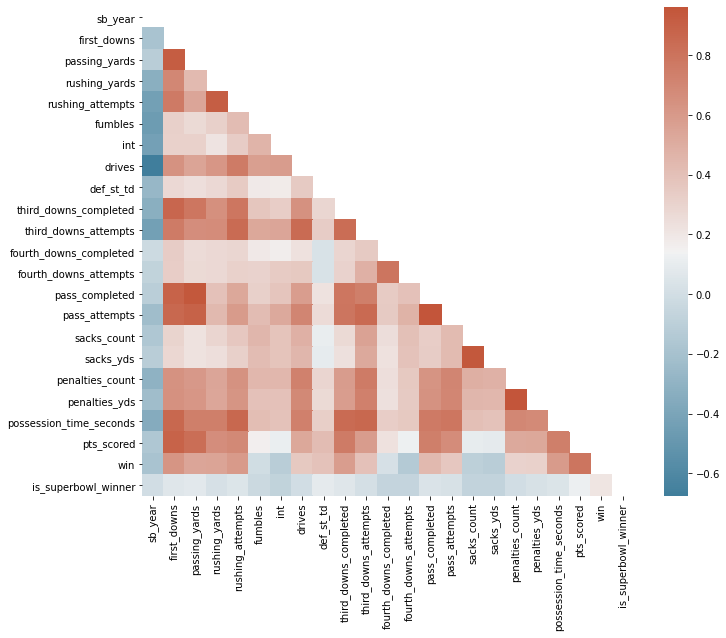

In [231]:
# Draw the heatmap with the mask and correct aspect ratio
corr = df_grouped.corr()

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

# Predictive Modeling

In [73]:
df_final.columns

Index(['date', 'team', 'first_downs', 'passing_yards', 'rushing_yards',
       'total_yards', 'rushing_attempts', 'fumbles', 'int', 'turnovers',
       'drives', 'def_st_td', 'third_downs_completed', 'third_downs_attempts',
       'fourth_downs_completed', 'fourth_downs_attempts', 'pass_completed',
       'pass_attempts', 'sacks_count', 'sacks_yds', 'penalties_count',
       'penalties_yds', 'possession_time_seconds', 'pts_scored', 'win',
       'super_bowl_winner', 'sb_year', 'is_superbowl_winner'],
      dtype='object')

In [ ]:
# Approach 1
df_model = df_final[['team','first_downs', 'passing_yards', 'rushing_yards',
                     'total_yards', 'rushing_attempts', 'fumbles', 'int', 'turnovers',
                     'drives', 'def_st_td', 'third_downs_completed', 'third_downs_attempts',
                     'fourth_downs_completed', 'fourth_downs_attempts', 'pass_completed',
                     'pass_attempts', 'sacks_count', 'sacks_yds', 'penalties_count',
                     'penalties_yds', 'possession_time_seconds', 'pts_scored', 'win',
                     'super_bowl_winner', 'sb_year', 'is_superbowl_winner']]

X=df_model.drop(columns=['team','super_bowl_winner','sb_year','is_superbowl_winner'])
y=df_model['is_superbowl_winner']

In [182]:
# Approach 2
df_model = df_grouped[['team','first_downs', 'passing_yards', 'rushing_yards',
                       'rushing_attempts', 'fumbles', 'int',
                     'drives', 'def_st_td', 'third_downs_completed', 'third_downs_attempts',
                     'fourth_downs_completed', 'fourth_downs_attempts', 'pass_completed',
                     'pass_attempts', 'sacks_count', 'sacks_yds', 'penalties_count',
                     'penalties_yds', 'possession_time_seconds', 'pts_scored', 'win',
                     'sb_year', 'is_superbowl_winner']]

X=df_model.drop(columns=['team','sb_year','is_superbowl_winner'])
y=df_model['is_superbowl_winner']

## Scaling

In [183]:
# Scale with MinMaxScaler to avoid outsize effect of 'possession_time_seconds'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = X.columns

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

## Spliting

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Remedy for imbalanced dataset

In [187]:
# Use SMOTE. Need to check SMOTE vs SMOTEEN
from collections import Counter
from imblearn.over_sampling import SMOTE

X_train_original_index =X_train.index
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

X_train = X_resampled
y_train = y_resampled

[(0, 413), (1, 15)]
[(0, 413), (1, 413)]


## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix


In [189]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat_binary = LR.predict(X_train)
print("Accuracy:" ,accuracy_score(y_train, yhat_binary))

Accuracy: 0.7941888619854721


In [220]:
accuracy_score(y_test, LR.predict(X_test))
confusion_matrix(y_test, LR.predict(X_test))

0.7075471698113207

array([[145,  62],
       [  0,   5]], dtype=int64)

In [190]:
yhat = LR.predict(X_test)
yhat

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

array([[0.49052898, 0.50947102],
       [0.49123695, 0.50876305],
       [0.52326359, 0.47673641],
       [0.52253578, 0.47746422],
       [0.56472798, 0.43527202],
       [0.61335831, 0.38664169],
       [0.56798835, 0.43201165],
       [0.5730947 , 0.4269053 ],
       [0.56812241, 0.43187759],
       [0.48255748, 0.51744252],
       [0.51042318, 0.48957682],
       [0.49422948, 0.50577052],
       [0.51034213, 0.48965787],
       [0.52969993, 0.47030007],
       [0.49225349, 0.50774651],
       [0.59245482, 0.40754518],
       [0.53387196, 0.46612804],
       [0.5078576 , 0.4921424 ],
       [0.5285022 , 0.4714978 ],
       [0.55625352, 0.44374648],
       [0.51737835, 0.48262165],
       [0.4352833 , 0.5647167 ],
       [0.54413684, 0.45586316],
       [0.52081669, 0.47918331],
       [0.5130323 , 0.4869677 ],
       [0.52936468, 0.47063532],
       [0.47793791, 0.52206209],
       [0.43561989, 0.56438011],
       [0.5582264 , 0.4417736 ],
       [0.4587511 , 0.5412489 ],
       [0.

In [191]:
teams =df_model['team']
year =df_model['sb_year']

In [192]:
#Recreate index to get final probability table

ind_list =X_test.index
teams =df_model['team'].iloc[ind_list]
year =df_model['sb_year'].iloc[ind_list]

In [193]:
lr_rank = pd.DataFrame({'Team':teams, 'Year':year, 'Prediction':yhat_prob[:,1]}) 
lr_rank.sort_values(by=['Year','Prediction'], ascending=False)

,Team,Year,Prediction
633,Saints,2021,0.494783
635,Steelers,2021,0.483380
627,Packers,2021,0.482448
638,Vikings,2021,0.478257
626,Lions,2021,0.475925
...,...,...,...
30,Vikings,2002,0.444806
11,Cowboys,2002,0.432076
31,Washington,2002,0.431878
28,Texans,2002,0.410221


## Random Forest

In [215]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [218]:
accuracy_score(y_test, clf.predict(X_test))
confusion_matrix(y_test, clf.predict(X_test))

0.839622641509434

array([[176,  31],
       [  3,   2]], dtype=int64)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Feature Importances')

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x2d3aba58670>,
 [Text(0, 0, 'pass_completed'),
  Text(0, 1, 'penalties_count'),
  Text(0, 2, 'sacks_yds'),
  Text(0, 3, 'penalties_yds'),
  Text(0, 4, 'def_st_td'),
  Text(0, 5, 'sacks_count'),
  Text(0, 6, 'pass_attempts'),
  Text(0, 7, 'third_downs_attempts'),
  Text(0, 8, 'rushing_yards'),
  Text(0, 9, 'third_downs_completed')])

Text(0.5, 0, 'Relative Importance')

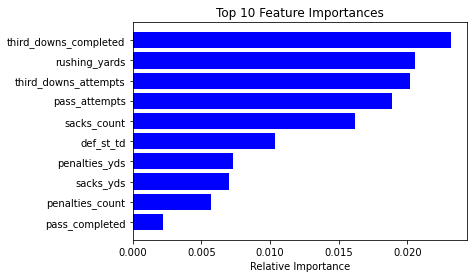

In [195]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[:10]

plt.figure(1)
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [196]:
yhat_prob_clf = clf.predict_proba(X_test)
yhat_prob_clf

array([[0.35378845, 0.64621155],
       [0.79503392, 0.20496608],
       [0.83562121, 0.16437879],
       [0.70753753, 0.29246247],
       [0.83090905, 0.16909095],
       [0.91451801, 0.08548199],
       [0.90934137, 0.09065863],
       [0.85791613, 0.14208387],
       [0.92961393, 0.07038607],
       [0.58871228, 0.41128772],
       [0.72037396, 0.27962604],
       [0.60058322, 0.39941678],
       [0.71878968, 0.28121032],
       [0.78023255, 0.21976745],
       [0.73301237, 0.26698763],
       [0.8968735 , 0.1031265 ],
       [0.79984187, 0.20015813],
       [0.7531827 , 0.2468173 ],
       [0.82970229, 0.17029771],
       [0.87656986, 0.12343014],
       [0.81865123, 0.18134877],
       [0.25259235, 0.74740765],
       [0.81495598, 0.18504402],
       [0.68742569, 0.31257431],
       [0.51650254, 0.48349746],
       [0.67596641, 0.32403359],
       [0.47773569, 0.52226431],
       [0.35656671, 0.64343329],
       [0.76340161, 0.23659839],
       [0.4947608 , 0.5052392 ],
       [0.

In [197]:
clf_rank = pd.DataFrame({'Team':teams, 'Year':year, 'Prediction':yhat_prob_clf[:,1]}) 
clf_rank.sort_values(by=['Year','Prediction'], ascending=False)

,Team,Year,Prediction
635,Steelers,2021,0.451805
627,Packers,2021,0.451805
609,Bears,2021,0.451805
615,Cardinals,2021,0.451805
636,Texans,2021,0.444766
...,...,...,...
23,Rams,2002,0.201771
24,Ravens,2002,0.197028
11,Cowboys,2002,0.177775
2,Bengals,2002,0.133122


## XGBoost

In [214]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

[06:29:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [219]:
accuracy_score(y_test, xgb_clf.predict(X_test))
confusion_matrix(y_test, xgb_clf.predict(X_test))

0.9433962264150944

array([[200,   7],
       [  5,   0]], dtype=int64)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Feature Importances')

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x2d3aad944f0>,
 [Text(0, 0, 'third_downs_completed'),
  Text(0, 1, 'drives'),
  Text(0, 2, 'fumbles'),
  Text(0, 3, 'pass_completed'),
  Text(0, 4, 'penalties_yds'),
  Text(0, 5, 'pass_attempts'),
  Text(0, 6, 'sacks_yds'),
  Text(0, 7, 'fourth_downs_completed'),
  Text(0, 8, 'rushing_attempts'),
  Text(0, 9, 'passing_yards')])

Text(0.5, 0, 'Relative Importance')

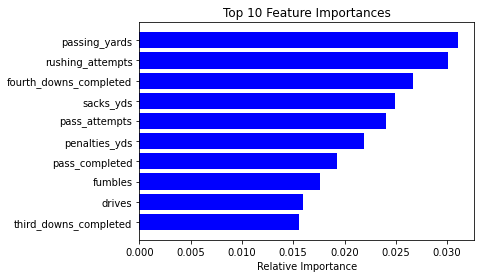

In [199]:
features = X_train.columns
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[:10]

plt.figure(1)
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [200]:
yhat_prob_xgb_clf = xgb_clf.predict_proba(X_test)
yhat_prob_xgb_clf

array([[7.52654731e-01, 2.47345269e-01],
       [9.99305189e-01, 6.94830727e-04],
       [9.99572277e-01, 4.27701336e-04],
       [9.77601051e-01, 2.23989300e-02],
       [9.99740541e-01, 2.59463326e-04],
       [9.99962807e-01, 3.72192044e-05],
       [9.99928296e-01, 7.17102812e-05],
       [9.99859273e-01, 1.40728822e-04],
       [9.99876559e-01, 1.23466612e-04],
       [9.98870075e-01, 1.12990558e-03],
       [9.99900639e-01, 9.93614376e-05],
       [9.98320520e-01, 1.67945318e-03],
       [9.89761233e-01, 1.02387927e-02],
       [9.99934018e-01, 6.59976868e-05],
       [9.99297798e-01, 7.02187477e-04],
       [9.99641240e-01, 3.58755933e-04],
       [9.99725282e-01, 2.74715683e-04],
       [9.99140918e-01, 8.59055726e-04],
       [9.99557018e-01, 4.42984834e-04],
       [9.99616325e-01, 3.83660488e-04],
       [9.99410570e-01, 5.89405070e-04],
       [2.04901874e-01, 7.95098126e-01],
       [9.99887764e-01, 1.12256253e-04],
       [9.98397112e-01, 1.60289009e-03],
       [9.911601

In [201]:
xgb_clf_rank = pd.DataFrame({'Team':teams, 'Year':year, 'Prediction':yhat_prob_clf[:,1]}) 
xgb_clf_rank.sort_values(by=['Year','Prediction'], ascending=False)

,Team,Year,Prediction
635,Steelers,2021,0.451805
627,Packers,2021,0.451805
609,Bears,2021,0.451805
615,Cardinals,2021,0.451805
636,Texans,2021,0.444766
...,...,...,...
23,Rams,2002,0.201771
24,Ravens,2002,0.197028
11,Cowboys,2002,0.177775
2,Bengals,2002,0.133122


In [202]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(estimators=[
        ('lr', LR), ('clf', clf), ('xgb', xgb_clf)],
        voting='soft', weights=[1,1,1])

vote_clf = vote_clf.fit(X_train, y_train)

print(vote_clf.predict(X_train))

print(vote_clf.transform(X_train).shape)

[20:11:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [203]:
yhat_prob_vote_clf = vote_clf.predict_proba(X_test)
yhat_prob_vote_clf

array([[0.53232405, 0.46767595],
       [0.76185869, 0.23814132],
       [0.78615236, 0.21384763],
       [0.73589145, 0.26410854],
       [0.79845919, 0.20154081],
       [0.84261304, 0.15738697],
       [0.82575267, 0.17424733],
       [0.81029003, 0.18970997],
       [0.83253763, 0.16746238],
       [0.69004661, 0.30995338],
       [0.74356593, 0.25643407],
       [0.69771107, 0.30228892],
       [0.73963101, 0.26036899],
       [0.7699555 , 0.23004451],
       [0.74152122, 0.25847878],
       [0.82965652, 0.17034348],
       [0.77781304, 0.22218696],
       [0.75339374, 0.24660625],
       [0.7859205 , 0.2140795 ],
       [0.81081323, 0.18918676],
       [0.77848005, 0.22151994],
       [0.29759251, 0.70240749],
       [0.78632686, 0.21367314],
       [0.7355465 , 0.2644535 ],
       [0.673565  , 0.326435  ],
       [0.73509214, 0.26490786],
       [0.51050903, 0.48949098],
       [0.58396923, 0.41603077],
       [0.77374779, 0.22625221],
       [0.62384433, 0.37615568],
       [0.

In [204]:
vote_clf_rank = pd.DataFrame({'Team':teams, 'Year':year, 'Prediction':yhat_prob_vote_clf[:,1]}) 
vote_clf_rank.sort_values(by=['Year','Prediction'], ascending=False)

,Team,Year,Prediction
609,Bears,2021,0.542724
623,Giants,2021,0.534510
633,Saints,2021,0.323358
635,Steelers,2021,0.321903
627,Packers,2021,0.321593
...,...,...,...
23,Rams,2002,0.215692
28,Texans,2002,0.205482
11,Cowboys,2002,0.203394
2,Bengals,2002,0.180200


In [205]:
# Todo
# Convert data to correct type before modeling

# Model consideration
## Add more parameter
## Only by year?
## Hyperparameter tuning

## Match - by - Match winning probability